In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('student-por.csv')

In [3]:
filtered_data = data[data['age'] < 18]

In [4]:
numeric_data = filtered_data.select_dtypes(include=['float64', 'int64'])

In [5]:
print(f"Number of records with age < 18: {filtered_data.shape[0]}")

Number of records with age < 18: 468


In [6]:
print("Missing Values per Column:")
print(data.isnull().sum())

Missing Values per Column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [7]:
features = ['G1', 'G2', 'absences', 'Medu', 'Fedu', 'freetime', 'famrel', 'goout', 'health', 'Dalc', 'Walc']
target = 'G3'

In [8]:
print("\nData Summary:")
print(data.describe())


Data Summary:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.9

In [9]:
print("\nData Types and Categories:")
print(data.dtypes)


Data Types and Categories:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


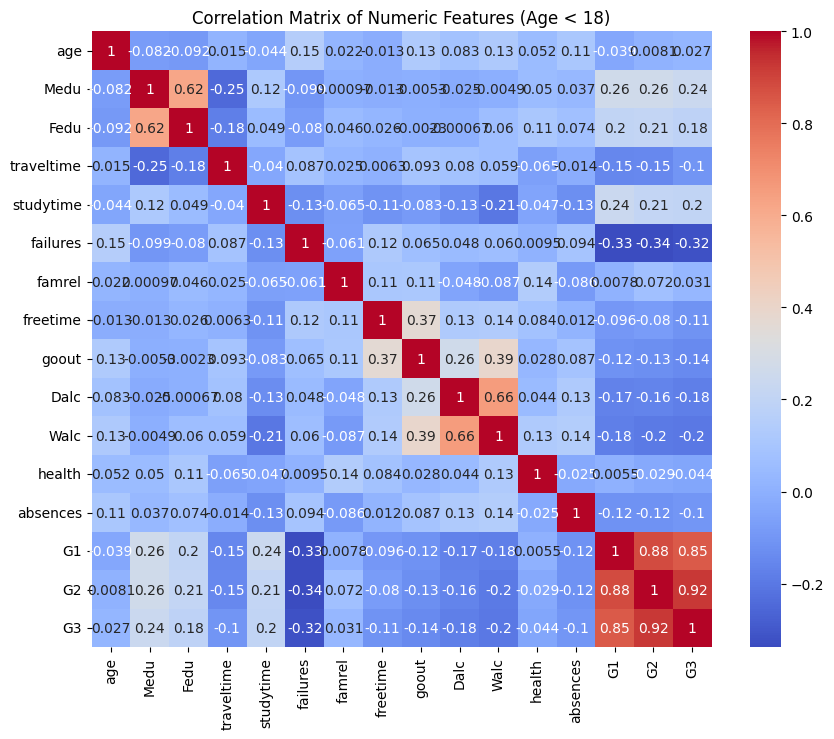

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features (Age < 18)")
plt.show()

In [13]:
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
filtered_data_encoded = pd.get_dummies(filtered_data, columns=categorical_columns, drop_first=True)

In [14]:
numeric_data_encoded = filtered_data_encoded.select_dtypes(include=['float64', 'int64'])

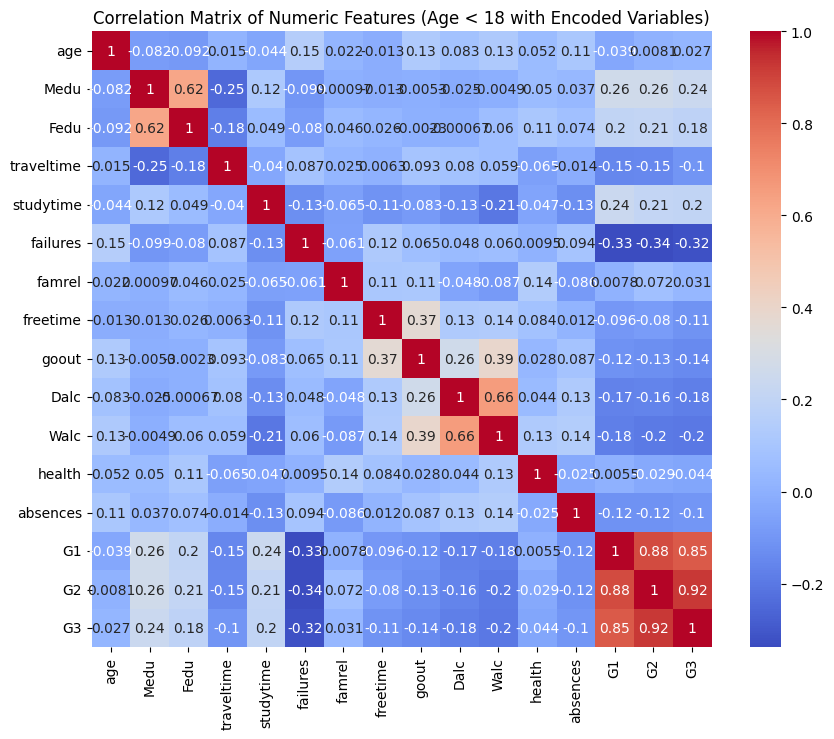

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features (Age < 18 with Encoded Variables)")
plt.show()

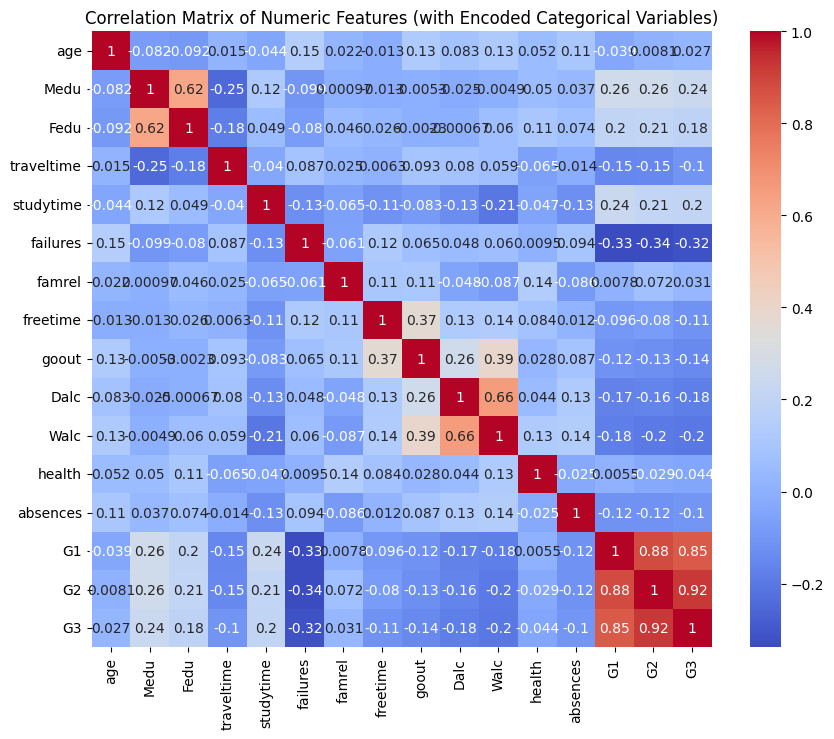

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features (with Encoded Categorical Variables)")
plt.show()

In [17]:
X = numeric_data_encoded.drop(columns=['G3'])  # Drop the target variable
y = numeric_data_encoded['G3']    

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 1.23
R^2 Score: 0.87


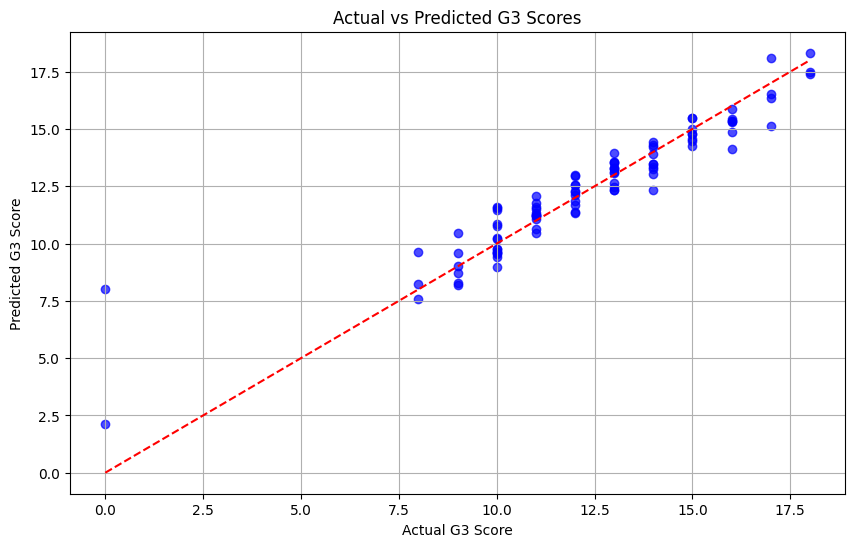

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted G3 Scores')
plt.xlabel('Actual G3 Score')
plt.ylabel('Predicted G3 Score')
plt.grid(True)
plt.show()

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load your dataset
data = pd.read_csv('student-por.csv')  # Update this with your dataset path

# Separate features and target variable
X = data.drop('G3', axis=1)  # Assuming 'G3' is the target variable
y = data['G3']

# Preprocessing
categorical_features = ['school', 'sex']
numeric_features = ['age', 'studytime', 'failures', 'famrel', 'goout', 'Dalc','Walc']

# OneHotEncode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_features]).toarray()

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_features])

# Combine the preprocessed features
X_preprocessed = np.concatenate([X_scaled, X_encoded], axis=1)

# Train the model
model = LinearRegression()
model.fit(X_preprocessed, y)  # Fitting the model with the training data

# Example input data for a new student
student_data = {
    'age': 17,               # Age of the student
    'studytime': 2,        # Hours of study
    'failures': 0,          # Number of past class failures
    'famrel': 5,        # Family relationship quality
    'goout': 3,            # Going out with friends
    'Dalc': 1,        # Average alcohol consumption
    'Walc':1,
    'school': 'GP',         # School name
    'sex': 'F'           # Gender
}

# Convert to DataFrame
student_df = pd.DataFrame([student_data])

# Preprocess the student's data (same steps as above)
encoded_categorical = encoder.transform(student_df[categorical_features]).toarray()
scaled_numeric = scaler.transform(student_df[numeric_features])

# Combine the preprocessed features
preprocessed_student_data = np.concatenate([scaled_numeric, encoded_categorical], axis=1)

# Predict the student's performance using the trained model
predicted_performance = model.predict(preprocessed_student_data)

# Output the prediction
print(f"Predicted performance for the student: {predicted_performance[0]:.2f}")


Predicted performance for the student: 13.47


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load your dataset
data = pd.read_csv('student-por.csv')  # Update this with your dataset path

# Separate features and target variable
X = data.drop('G3', axis=1)  # Assuming 'G3' is the target variable
y = data['G3']

# Preprocessing
categorical_features = ['school', 'sex']
numeric_features = ['age', 'studytime', 'failures', 'famrel', 'goout', 'Dalc','Walc']

# OneHotEncode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_features]).toarray()

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_features])

# Combine the preprocessed features
X_preprocessed = np.concatenate([X_scaled, X_encoded], axis=1)

# Train the model
model = LinearRegression()
model.fit(X_preprocessed, y)  # Fitting the model with the training data

# Example input data for a new student
student_data = {
    'age': 17,               # Age of the student
    'studytime': 2,        # Hours of study
    'failures': 0,          # Number of past class failures
    'famrel': 5,        # Family relationship quality
    'goout': 3,            # Going out with friends
    'Dalc': 1,        # Average alcohol consumption
    'Walc':1,
    'school': 'GP',         # School name
    'sex': 'F'           # Gender
}

# Convert to DataFrame
student_df = pd.DataFrame([student_data])

# Preprocess the student's data (same steps as above)
encoded_categorical = encoder.transform(student_df[categorical_features]).toarray()
scaled_numeric = scaler.transform(student_df[numeric_features])

# Combine the preprocessed features
preprocessed_student_data = np.concatenate([scaled_numeric, encoded_categorical], axis=1)

# Predict the student's performance using the trained model
predicted_performance = model.predict(preprocessed_student_data)

# Output the prediction
print(f"Predicted performance for the student: {predicted_performance[0]:.2f}")


Predicted performance for the student: 13.47
